# **Machine Translation with Transformer Networks**

---

__Author:__ Vincent Gurgul<br>
__Course:__ Information Systems Seminar<br>
__Lecturer:__ Prof. Dr. Stefan Lessmann<br>
__Semester:__ WS 2021/2022<br>
__Website:__ The data and the remaining notebooks are available through [GitHub](https://github.com/VincentGurgul/transformers)

<br>

---

# Table of Contents

**1. Introduction**<br>
**2. Literature Review**<br>
**3. Comparing Transformer Libraries**<br>
&ensp;&ensp;&ensp;3.1 Evaluation Metrics<br>
&ensp;&ensp;&ensp;3.2 Benchmarks<br>
&ensp;&ensp;&ensp;3.3 Preparation<br>
&ensp;&ensp;&ensp;3.4 MarianMT/OpusMT<br>
&ensp;&ensp;&ensp;3.5 mBART50<br>
&ensp;&ensp;&ensp;3.6 M2M-100-1.2B<br>
&ensp;&ensp;&ensp;3.7 WMT19 Winner<br>
**4. Results**<br>
**5. Discussion**<br>
**6. Conclusion**<br>
**References**

<br>

---

# 1. Introduction

The task of a translator is to express the meaning of a passage of text in a different language. Machine translation is a discipline that studies the performance of this task with the utilisation of digital computers. After decades of development, great achievements have been made in the field of machine translation in recent years with the advent of neural machine translation.

In this notebook a review of existing literature on machine translation will be conducted first. The literature review will include an overview of the history of machine translation and an introduction into the state-of-the-art neural network architecture for machine translation, the Transformer.

Then, language evaluation metrics are introduced and previous machine translation model architectures are presented, that will be used as a benchmark for the Transformer. Those include LSTM networks, CNNs and GLUs.

Finally, five different Transformer-based python libraries for machine translation will be evaluated and compared. The results of the empirical analysis and the advantages and disadvantages of each python package are presented. Then, possible future improvements of machine translation are discussed.

For a general introduction into the Transformer network and its architecture see our notebook 'Transformer_Introduction.ipynb', which you'll also find on our [Github](https://github.com/VincentGurgul/transformers).

<br>

---

# 2. Literature Review

The concept of using digital computers to translate documents between natural human languages was first mentioned by Warren Weaver in a letter to the cyberneticist Norbert Wiener in March 1947, in which he made references to cryptrography. [[Weaver, 1947]](#Weaver)

The first publicly demonstrated machine translation project was a Russian-English translation programme for the US military, developed as a collaboration between International Business Machines Corporation (IBM) and Georgetown University between 1951 and 1954. [[IBM, 1954]](#IBM)

Despite its anecdotally poor quality, the programme enjoyed high popularity among US military personnel who, for the first time, could at least get an impression of the content of Russian documents themselves without the diversions via third parties. However, it also raised expectations that automatic systems will be able to produce high-quality translations in the near future, which later turned out to be quite unrealistic. [[History of Information, n.d.]](#History)

In terms of methodology, there are two approaches to machine translation. The first approach was rule-based translation, which was dominant until 1990. In rule-based translation a bilingual dictionary and manually written rules are used. However, developing those rule-based algorithms is labor intensive and the rules can't be easily transferred from one language to another, making them hard to scale for multilingual translation. [[Wang et al., 2021]](#Wang2021)

In 1990, [[Brown et al., 1990]](#Brown) proposed the concept of statistical machine translation, in which machines learn from a large amount of data instead of relying on human experts to write rules. With the availability of large corpora of bilingual sentence pairs, corpus-based machine translation methods became dominant since then. [[Wang et al., 2021]](#Wang2021)

In April 2006, the first internet translation service based on statistical machine translation methods was launched by Google. [[Och, 2006]](#Och)

The introduction of pivot-based translation was responsible for significant improvements in the translations of low-resource languages. The idea is that the translation from a source to a target languange can be improved by introducing a third language, the pivot language, for which a larger amount of bilingual training data is available. [[Wang et al., 2006]](#Wang2006)

With strong progress in deep learning technology in speech, vision, and other fields, researchers began to apply deep learning technology to machine translation. In 2014, [[Bahdanau et al., 2014]](#Bahdanau) proposed an RNN-based attentional encoder-decoder neural network architecture for machine translation. The encoder maps the source sentence to a real-valued vector or matrix, from which the decoder creates the translation in the target language. In the same paper the authors also introduced the concept of the attention mechanism for the first time and coined the term “neural machine translation”. 

However, this network still had a significant weakness — the out-of-vocabulary problem — where the model is not capable of translating a word it has never encountered before. This problem was solved by [[Sennrich et al., 2015]](#Sennrich) with the introduction of byte-pair encoding as a subword-tokenization algorithm. This method made machine translation models capable of open-vocabulary translation by encoding rare and unknown words as sequences of subword units and is used in machine translation until this day.

Those advances in the field led to [[Dong et al., 2015]](#Dong) introducing the first multilingual neural machine translation model based on that attentional encoder-decoder architecture. This model achieved significantly higher translation quality over individually learned models for both high- and low-resource languages, by using a shared encoder.

In 2016, Google followed suit and transitioned their internet translation service to the neural machine translation system GNMT. [[Wu et al., 2016]](#Wu) One year later Baidu deployed its first large-scale NMT system which was based on an early version of MarianMT, an open-source translation model developed at the University of Edinburgh, Adam Mickiewicz University in Poznań and at Microsoft. [[Baidu, 2017]](#Baidu)

Different languages have different morphologies and structures, which makes translation among many different languages a very difficult task. Chinese, for example, is a subject-verb-object language, while Japanese is a subject-object-verb language. Therefore, when translating from Chinese to Japanese, long-distance reordering is usually required. This is the most significant challenge for the recurrence-based neural networks that have been used until this point, where information decays rapidly during transmission in the network. [[Wang et al., 2021]](#Wang2021)

That issue is resolved with the introduction of the state-of-the-art neural machine translation architecture, the Transformer, by [[Vaswani et al., 2017]](#Vaswani). The authors refrain from using the Attention mechanism as an intermediate module between the Encoder and the Decoder and instead make it the heart of the network by putting it directly in front of the neural network in every single encoder and decoder block. The Transformer architecture processes all words of the source language simultaneously rather than sequentially, allowing for high parallelization and theoretically infinitely long memory. 

This work has laid the foundation for two important machine translation models: bidirectional encoder representations from transformers (BERT) by Google [[Devlin et al., 2018]](#Devlin) and enhanced representation through knowledge integration (ERNIE) by Baidu. [[Sun et al., 2019]](#Sun)

In recent years the Transformer architecture has been applied to ever larger datasets and further developed by combining it with methods such as pivot-based translation, back-translation and multilingual finetuning.

This has led to the recent publishing of the best neural machine translation model to date by Facebook. [[Tran et al., 2021]](#Tran)

<br>

---


# 3. Comparing Transformer Libraries

## 3.1 Evaluation Metrics

One of the main challenges in developing machine translation models is evaluation. For the comparison of the machine translation python libraries four measures will be used – BLEU, GLEU, hLepor and the F-measure, whose underlying math and respective advantanges and disadvantages will be discussed in this section.

There are a few things all measures have in common:

- they're all bound between 0 and 1,
- because of that, they're sometimes referred to as percentages, e.g. being a score of 20, when in fact the score is 0.2,
- the higher they are, the better and
- they're based on either precision, recall or both.

It should also be kept in mind that the more reference translations are compared to, the higher the score in any language evaluation metric will be.

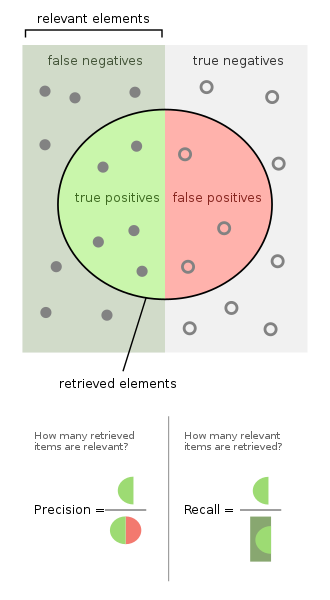

*Image credit to: [[Wikipedia, 2019]](#Wikipedia)*

In this context the true positives are all n-grams that appear both in one of the reference translations and in the candidate translation. The false positives are the candidate n-grams, that did not appear in any reference translation. The false negatives are the n-grams that appeared in a reference translation, but did not appear in the candidate translation. And finally, the true negatives are all other remaining n-grams that do not appear in either the reference nor the candidate translation. [[Melamed et al., 2003]](#Melamed)

Therefore, in the context of language evaluation, precision and recall can both be computed for any n-gram length and are denoted $P_n$ and $R_n$ respectively.

### BLEU

The BLEU score is the geometric mean of precision for different n-grams with brevity penalty. It is the most widely used evaluation metric for machine translation in the scientific literature. Typically (and in our case), BLEU-4, i.e. BLEU with up to 4-grams is used. [[Papineni et al., 2001]](#Papineni)

<br>

$$ \textit{BLEU-4} =  e^{1- {\textit{len(reference)} \over \textit{len(candidate)}}} \sqrt[4]{P_1 P_2 P_3 P_4}$$


### GLEU

The GLEU score was proposed by researchers at Google and is simply the minimum of precision and recall. [[Mutton et al., 2007]](#Mutton) In the following sections GLEU-4 will be used when referring to GLEU.

$$ \textit{GLEU-4} = min(P_4, R_4) $$

### hLepor

hLepor stands for harmonic mean of length penalty, precision, n-gram position difference penalty and recall. In the original paper (and in our case) this formula is used: [[Han et al., 2013]](#Han)

$$ hLepor = {10 \over {2 \over \textit{length penalty}} + {1 \over \textit{position penalty}} + {7({1 \over P} + {1 \over R}) \over 2}} $$

<br>

hLepor is the only measure that is position-dependent, all other measures do not take into account the word order at all. This makes hLepor the most meaningful measure for language evaluation.

### F-measure

The F-measures is by far the ealierst measure for language evaluation and simply combines precision and recall. [[MUC-4, 1992]](#MUC)

$$ F = 2 * {\textit{precision} * \textit{recall} \over \textit{precision} + \textit{recall}} $$

<br>

In the following sections the arithmetic mean of F-1, F-2 and F-L will be used when referring to the F-measure. F-1 and F-2 are the F-scores using unigrams and bigrams respectively, while F-L measures the longest common subsequence. This simply means that the longest n-gram is counted that is shared by both the reference and candidate translation. The intuition being that a longer shared subsequences indicate higher similarity.


## 3.2 Benchmarks

In the following section we will look at different model architectures that have been used for machine translation in existing literature. We will compare their BLEU scores on the English-German dataset from the Ninth Workshop on Statistical Machine Translation in 2014, to set a benchmark for what to expect from the modern Transformer-based models that are being compared from section 3.4 onwards.

The Workshop on Statistical Machine Translation (WMT) is a series of annual workshops and conferences on machine translation, going back to 2006. Each year various machine translation challenges are published beforehand and evaluated during the conference, including translation of news, chats, biomedical data, low-resource languages and automatic post-editing. [[WMT, 2014]](#WMT)

When publishing a new machine translation model or architecture it has become common among researchers to evaluate it on the WMT news dataset for comparabilities' sake and because it used to be and still is one of the highest quality open-source sets of multilingual sentence pairs.

As the benchmarks are already a couple years old, they were all evaluated on the WMT14 news dataset. We will be evaluating the Python libraries in sections 3.4 onwards on the WMT16 news dataset, because of its larger size and improved quality, but the BLEU values are still comparable.



### Attentional LSTMs

<div>
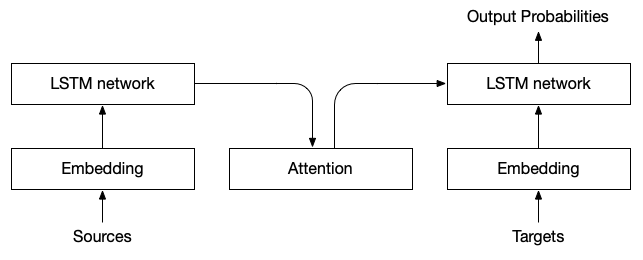
</div>

The first architecture that will be introduced as a benchmark is a combination of LSTM networks and attention. A network of bi- or uni-directional LSTMs is used as an Encoder, a uni-directional LSTM network is used as a decoder and in between there is an attention module. This architecture has been used for machine translation by [[Luong et al., 2015]](#Luong) and [[Wu et al., 2016]](#Wu).

[[Luong et al., 2015]](#Luong) presented a BLEU score of 20.9 with a single model and 23.0 with an ensemble of 8 models on the WMT14 En-De dataset. The architecture they used consisted of 15 uni-directional encoder layers and 15 uni-directional decoder layers.

Google's Neural Machine Translation system (GNMT) presented by [[Wu et al., 2016]](#Wu) on the other hand achieved a BLEU score of 24.61 with a single model on the same dataset. GNMT uses 8 encoder layers (1 bi-directional layer and 7 uni-directional layers) and 8 uni-directional decoder layers.

### Attentional CNNs


<div>
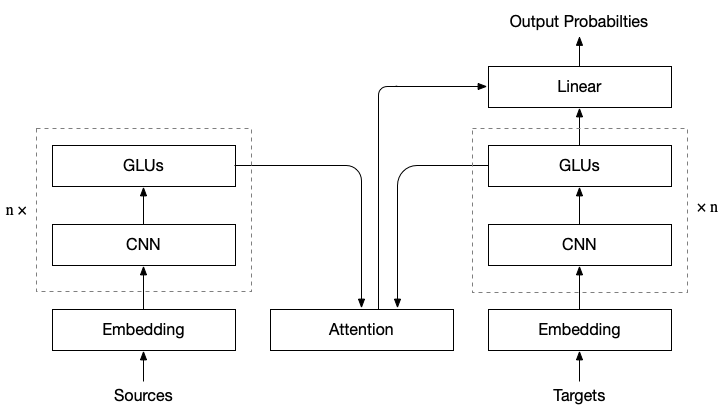
</div>

The attentional CNN combines convolutions with gated linear units and the attention mechanism. This architecture has been proposed by [[Gehring et al., 2017]](#Gehring) and successfully applied for machine translation. Because the architecture is based entirely on convolutional neural networks, computations can be fully parallelized during training.

This network outperformes the attentional LSTM with a BLEU of 24.61 for a single model and 26.43 for an ensemble of 8 models on the WMT14 En-De dataset.

### Transformers



<div>
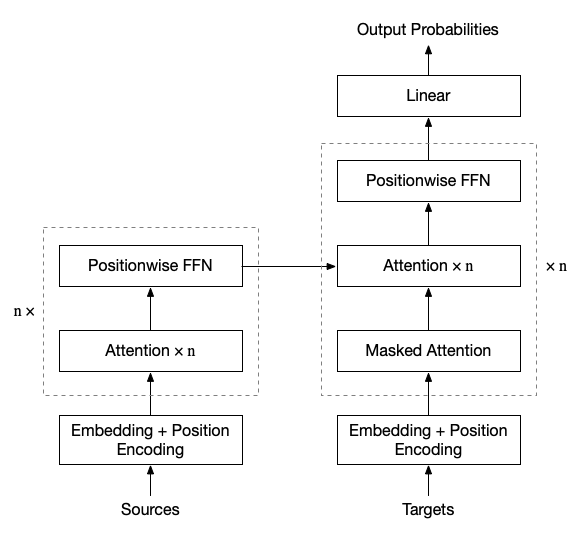
</div>

Finally we look at the network architecture introduced by [[Vaswani et al., 2017]](#Vaswani), commonly referred to as the transformer. It dispenses with recurrence or convolutions entirely and makes the attention mechanism the heart of the network, only accompanied by positionwise feed-forward networks, hence the name of the paper — “Attention is all you need”.

The authors refrain from using the Attention mechanism as an intermediate module between the Encoder and the Decoder though and instead put it directly in front of the feed-forward neural network in every single encoder and decoder block. The Transformer architecture processes all words of the source language simultaneously rather than sequentially, allowing for high parallelization and allowing it to theoretically capture infinitely long relationships. 

The proposed network consist of 6 encoder layers, 6 decoder layers and 8 attention heads in each attention block. Because the network processes all inputs simultaneously, it requires positional encoding to be added to the word embeddings.

The authors also test their network on the WMT14 En-De dataset and are able to outperform all previous architectures with a BLEU score of 28.40 for a single model. This result should set the expectation for the performance of the libraries that are being compared in the following sections, as their architectures are identical or very similar to that proposed by [[Vaswani et al., 2017]](#Vaswani).

### Overview

<div>
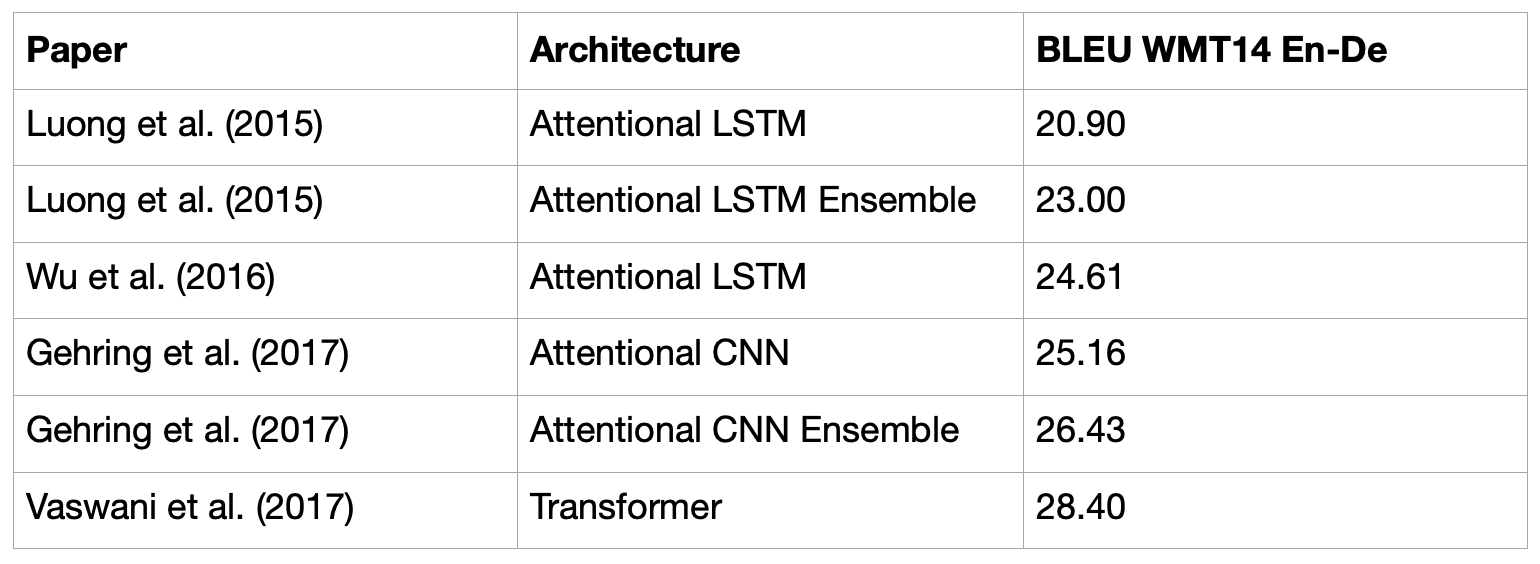
</div>

As you can see summarized in the table above, a significant improvement has been achieved when transitioning from the recurrent LSTM networks to convolution-based network architectures.

However, the greatest step has been made with the introduction of the Transformer. Note that the BLEU score of 28.4 that Vaswani et al. were able to achieve was still limited by the computational resources as well as the amount and quality of training data and sampling methods.

The most recent Transformer model which won the WMT21 news translation challenge in several languages achieved a new record of BLEU 40.8 when translating from English to German. This was achieved using multilingual training data and multilingual fine-tuning.

When using an emsemble of models and combining them with reranking and postprocessing, the authors were able to achieve a BLEU score of 42.6, beating the WMT20 winning model by 3.8 points. [[Tran et al., 2021]](#Tran)

Now, how do these scores compare to what a human translator would achieve? Even though the BLEU score ranges from 0 to 1, a professional human translation will rarely achieve a score of 1, unless it is identical to the reference translation(s). And this is unlikely, as professional translators don't necessarily always agree on what a 'correct' translation is.

The authors of the BLEU metric give an answer to this question in their paper [[Papineni et al., 2001]](#Papineni):

``` 
“[...] on a test corpus of about 500 sentences (40 general news stories), a human translator scored 0.3468
against four references and scored 0.2571 against two references.”
```

Therefore, as the WMT news translation datasets only feature one reference translation, a human translator would be expected to achieve a BLEU score of less than 0.2571. This would be less than even some convolution-based networks were able to achieve in 2017. Unfortunately, the paper does not specify the skill level of the translator.


## 3.3 Preparation

### Colab with GPU

When running this notebook in colab, ensure that you run it with a GPU as hardware accelerator. To enable this:
- Navigate to Edit → Notebook Settings
- select GPU from the Hardware Accelerator drop-down

With `!nvidia-smi` we can check which GPU was assigned to us in Colab.

In [ ]:
!nvidia-smi

Tue Jan 11 19:27:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install packages

We will need Python 3.7

In [ ]:
!sudo update-alternatives --set python3 /usr/bin/python3.7

In [ ]:
!python3 --version

Python 3.7.12


Now, install the required packages and then restart the runtime

In [ ]:
!pip install d2l==0.17.1 datasets==1.17.0 EasyNMT==2.0.1 hLepor==0.0.4 nptyping==1.4.4 rouge-score==0.0.4 sentencepiece==0.1.96
!pip install transformers==4.15.0 bitarray==2.3.4 fairseq==0.10.2 fastBPE==0.1.0 fastparquet==0.7.2 hydra-core==1.1.1 matplotlib==3.0.0
!pip install humanfriendly==10.0 nltk==3.4.5 sacrebleu==2.0.0 sacremoses==0.0.46 subword-nmt==0.3.8

### Import modules

In [ ]:
import os
import re
import sys
import time
import datetime
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import nltk.translate.bleu_score as bleu
import nltk.translate.gleu_score as gleu

from google.colab import drive
from datasets import load_dataset
from d2l import tensorflow as d2l
from fairseq.models.transformer import TransformerModel
from transformers import MarianMTModel, MarianTokenizer
from easynmt import EasyNMT
from rouge_score import rouge_scorer
from hlepor import single_hlepor_score
from nltk.translate.bleu_score import SmoothingFunction
from humanfriendly import format_timespan

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pd.options.mode.chained_assignment = None

If you're using Colab, please mount your Google Drive

In order to run the package comparison you will need the 'test_dataset.parquet' file. Please make sure that this file is in the same directory as this notebook.

In [ ]:
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive')

Mounted at /content/drive


### Setting up demonstration text and test dataset to evaluate performance


In [ ]:
lang = "de"
target_lang = "en"

In [ ]:
text = "Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf."

In [ ]:
test_dataset = pd.read_parquet('/content/drive/MyDrive/test_dataset.parquet', engine='fastparquet')


## 3.4 MarianMT/OpusMT

In the following sections we will import and demonstrate the usage of various Python transformer libraries. Furthermore we will compute BLEU, GLEU, hLepor and F scores on the WMT16 German-English test dataset for each package. If you haven't downloaded the dataset yet ('test_dataset.parquet'), you can find it on the [GitHub](https://github.com/VincentGurgul/transformers) repository.

The first library that is covered is MarianMT/OpusMT. Marian is an open-source tool for training and serving neural machine translation, mostly developed at the University of Edinburgh, Adam Mickiewicz University in Poznań and at Microsoft. [[Junczys-Dowmunt et al., 2018]](#Junczys)

Marian closely follows the transformer structure from [[Vaswani et al., 2017]](#Vaswani), but optimized for high training and translation speed by implementing multi-GPU training and batched beam search.

In 2020, the NLP group at the University of Helsinki trained many translation models using Marian on parallel data collected at Opus, and open-sourced those models in cooperation with the European Language Grid under the name OpusMT. [[Tiedemann & Thottingal, 2020]](#Tiedemann)

The strength of the OpusMT adaptation of MarianMT lies in the use of the open source Opus dataset with 55 million sentence pairs from medicine, natural sciences, legal texts, news, movie subtitles and religious texts. Even though it can translate between 186 languages, each model is only 300 MB large.

The developers of the Huggingface Transformers library for Python have converted OpusMT to the Huggingface pytorch framework. [[Wolf et al., 2020]](#Wolf) In the following, both this pytorch implementation of OpusMT as well as the original one in C++ will be evaluated.


### Pytorch Demonstration

Download and set up the model through Huggingface transformers

In [ ]:
MarianMT_model_name = f'Helsinki-NLP/opus-mt-{lang}-{target_lang}'

# Download the model and the tokenizer
MarianMT_model = MarianMTModel.from_pretrained(MarianMT_model_name)
MarianMT_tokenizer = MarianTokenizer.from_pretrained(MarianMT_model_name)

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/750k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Translate the German text passage:

_“Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf.”_


In [ ]:
start_time = time.time()

# Tokenize the text
MarianMT_batch = MarianMT_tokenizer([text], return_tensors="pt", padding=True)

# Make sure that the tokenized text does not exceed the maximum
# allowed size of 512
MarianMT_batch["input_ids"] = MarianMT_batch["input_ids"][:, :512]
MarianMT_batch["attention_mask"] = MarianMT_batch["attention_mask"][:, :512]

# Perform the translation and decode the output
MarianMT_translation = MarianMT_model.generate(**MarianMT_batch, num_beams=5)
MarianMT_output = MarianMT_tokenizer.batch_decode(
    MarianMT_translation, skip_special_tokens=True)
MarianMT_output = str(MarianMT_output)[2:][:len(MarianMT_output)-3]

print("Translated in {:.2f} sec".format(time.time()-start_time))

Translated in 5.40 sec


In [ ]:
MarianMT_output

'Caffeine is an alkaloid from the group of substances of the xanthine. It belongs to the psychoactive substances with stimulating effect. Caffeine is an activity of nerve stimulating component of stimulants such as coffee, tea, cola, mate, guaraná, energy drinks and (in smaller amounts) cocoa. In chemically pure form it occurs as a white, odourless, crystalline powder with bitter taste.'

### Pytorch: Application to the test dataset

In [ ]:
MarianMT_data = test_dataset

In [ ]:
def MarianMT_translate(text):
    MarianMT_batch = MarianMT_tokenizer([text], return_tensors="pt", padding=True)
    MarianMT_batch["input_ids"] = MarianMT_batch["input_ids"][:, :512]
    MarianMT_batch["attention_mask"] = MarianMT_batch["attention_mask"][:, :512]
    MarianMT_translation = MarianMT_model.generate(**MarianMT_batch)
    MarianMT_output = MarianMT_tokenizer.batch_decode(
        MarianMT_translation, skip_special_tokens=True)
    MarianMT_output = str(MarianMT_output)[2:][:len(MarianMT_output)-3]
    return MarianMT_output

In [ ]:
start_time = time.time()

MarianMT_data['output'] = MarianMT_data.apply(
    lambda x: MarianMT_translate(x['de']), axis=1)

duration_in_seconds = round(time.time()-start_time, 1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    MarianMT_data['bleu-4'] = MarianMT_data.apply(
        lambda x: bleu.sentence_bleu([str(x['target']).split()], str(x['output']).split(),
                                     smoothing_function=SmoothingFunction().method0), axis=1)

MarianMT_data['gleu-4'] = MarianMT_data.apply(
    lambda x: gleu.sentence_gleu([str(x['target']).split()], str(x['output']).split()), axis=1)

MarianMT_data['hLepor'] = MarianMT_data.apply(
    lambda x: single_hlepor_score(x['target'], str(x['output'])), axis=1)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL',], use_stemmer=True)

MarianMT_data['f_score'] = MarianMT_data.apply(
    lambda x: np.mean([scorer.score(x['target'], str(x['output']))['rouge1'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rouge2'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rougeL'].fmeasure]), 
              axis=1)

print("Results over the test dataset:\n")
print(f"Translation duration: {format_timespan(duration_in_seconds)} ({datetime.timedelta(seconds=round(duration_in_seconds, 0))})\n")
print(f"Average BLEU: {round(np.mean(MarianMT_data['bleu-4']), 4)}")
print(f"Average GLEU: {round(np.mean(MarianMT_data['gleu-4']), 4)}")
print(f"Average hLepor: {round(np.mean(MarianMT_data['hLepor']), 4)}")
print(f"Average F-score: {round(np.mean(MarianMT_data['f_score']), 4)}")

Results over the test dataset:

Translation duration: 1 hour, 11 minutes and 28.9 seconds (1:11:29)

Average BLEU: 0.2867
Average GLEU: 0.3797
Average hLepor: 0.7635
Average F-score: 0.6315


### C++ Demonstration



Download and set up the model through the ease-of-use focused machine translation package EasyNMT

In [ ]:
# Download the model (size: 300 MB)
OpusMT = EasyNMT('opus-mt')

11.9kB [00:00, 3.44MB/s]                   


Translate the German text passage:

_“Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf.”_


In [ ]:
start_time = time.time()

# Translate the text
OpusMT_output = OpusMT.translate(text,
                                 target_lang=target_lang,
                                 beam_size=9)

print("Translated in {:.2f} sec".format(time.time()-start_time))

Translated in 1.25 sec


In [ ]:
OpusMT_output

'Caffeine is an alkaloid of the xanthine group. It is one of the psychoactive substances with a stimulating effect. Caffeine is an activity of nerve stimulating component of stimulants such as coffee, tea, cola, mate, guaraná, energy drinks and (in smaller amounts) cocoa. In chemically pure form, it appears as a white, odourless, crystalline powder with a bitter taste.'

As one could observe above, the translation differs slightly from the translation of the pytorch implementation. The reaseon for this is that Huggingface has implemented a slightly different beam search algorithm in their Transformer library than was originally used by the team from the University of Helsinki. However, as will be presented in the section below, the language evalation scores are very similar nevertheless.

### C++: Application to the test dataset

In [ ]:
OpusMT_data = test_dataset

In [ ]:
def OpusMT_translate(text):
    OpusMT_output = OpusMT.translate(text,
                                     source_lang=lang,
                                     target_lang=target_lang,
                                     beam_size=9,
                                     document_language_detection=False)
    return OpusMT_output

In [ ]:
start_time = time.time()

OpusMT_data['output'] = OpusMT_data.apply(
    lambda x: OpusMT_translate(x['de']), axis=1)

duration_in_seconds = round(time.time()-start_time, 1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    OpusMT_data['bleu-4'] = OpusMT_data.apply(
        lambda x: bleu.sentence_bleu([str(x['target']).split()], str(x['output']).split(),
                                     smoothing_function=SmoothingFunction().method0), axis=1)

OpusMT_data['gleu-4'] = OpusMT_data.apply(
    lambda x: gleu.sentence_gleu([str(x['target']).split()], str(x['output']).split()), axis=1)

OpusMT_data['hLepor'] = OpusMT_data.apply(
    lambda x: single_hlepor_score(x['target'], str(x['output'])), axis=1)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL',], use_stemmer=True)

OpusMT_data['f_score'] = OpusMT_data.apply(
    lambda x: np.mean([scorer.score(x['target'], str(x['output']))['rouge1'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rouge2'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rougeL'].fmeasure]), 
              axis=1)

print("Results over the test dataset:\n")
print(f"Translation duration: {format_timespan(duration_in_seconds)} ({datetime.timedelta(seconds=round(duration_in_seconds, 0))})\n")
print(f"Average BLEU: {round(np.mean(OpusMT_data['bleu-4']), 4)}")
print(f"Average GLEU: {round(np.mean(OpusMT_data['gleu-4']), 4)}")
print(f"Average hLepor: {round(np.mean(OpusMT_data['hLepor']), 4)}")
print(f"Average F-score: {round(np.mean(OpusMT_data['f_score']), 4)}")

Results over the test dataset:

Translation duration: 29 minutes and 49.4 seconds (0:29:49)

Average BLEU: 0.287
Average GLEU: 0.3798
Average hLepor: 0.7606
Average F-score: 0.6292


## 3.5 mBART50

The second model we look at is mBART50, the implementation of Facebook's mBART model for 52 languages. [[Tang et al., 2020]](#Tang)

mBART-50 is English-centric, i.e. all languages are first translated to English and then from English to another language. For translations in non-English direction the model therefore consists of two stacked transformer networks. This means that it performs best when translating to or from English, where only one transformer network is utilised.

Not only has it been implemented for more languages, it is also outperforming mBART thanks to multilingual finetuning. This means, that even though the model is English-centric, the finetuning was not only done with sentence pairs that included English, but with language pairs from many other different languages.



### Demonstration

Download and set up the model

In [ ]:
# Download the model (size: 2.3 GB)
mBART50 = EasyNMT('mbart50_m2m')

24.9kB [00:00, 7.41MB/s]                   


Downloading:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/529 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/649 [00:00<?, ?B/s]

Translate the German text passage:

_“Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf.”_


In [ ]:
start_time = time.time()

# Translate the text
mBART50_output = mBART50.translate(text,
                                   target_lang=target_lang,
                                   beam_size=9)

print("Translated in {:.2f} sec".format(time.time()-start_time))

Translated in 4.50 sec


In [ ]:
mBART50_output

'Caffeine is an alkaloid from the Xanthine group. It is one of the psychoactive substances with a stimulating effect. Caffeine is a nerve-enhancing component of pleasures such as coffee, tea, cola, Mate, Guaraná, energy drinks and (in smaller quantities) cocoa. In pure chemical form, it appears as white, odorless, crystalline powder with bitter taste.'

### Application to the test dataset

In [ ]:
mBART50_data = test_dataset

In [ ]:
def mBART50_translate(text):
    mBART50_output = mBART50.translate(text,
                                       source_lang=lang,
                                       target_lang=target_lang,
                                       beam_size=9,
                                       document_language_detection=False)
    return mBART50_output

In [ ]:
start_time = time.time()

mBART50_data['output'] = mBART50_data.apply(
    lambda x: mBART50_translate(x['de']), axis=1)

duration_in_seconds = round(time.time()-start_time, 1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    mBART50_data['bleu-4'] = mBART50_data.apply(
        lambda x: bleu.sentence_bleu([str(x['target']).split()], str(x['output']).split(),
                                     smoothing_function=SmoothingFunction().method0), axis=1)

mBART50_data['gleu-4'] = mBART50_data.apply(
    lambda x: gleu.sentence_gleu([str(x['target']).split()], str(x['output']).split()), axis=1)

mBART50_data['hLepor'] = mBART50_data.apply(
    lambda x: single_hlepor_score(x['target'], str(x['output'])), axis=1)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL',], use_stemmer=True)

mBART50_data['f_score'] = mBART50_data.apply(
    lambda x: np.mean([scorer.score(x['target'], str(x['output']))['rouge1'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rouge2'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rougeL'].fmeasure]), 
              axis=1)

print("Results over the test dataset:\n")
print(f"Translation duration: {format_timespan(duration_in_seconds)} ({datetime.timedelta(seconds=round(duration_in_seconds, 0))})\n")
print(f"Average BLEU: {round(np.mean(mBART50_data['bleu-4']), 4)}")
print(f"Average GLEU: {round(np.mean(mBART50_data['gleu-4']), 4)}")
print(f"Average hLepor: {round(np.mean(mBART50_data['hLepor']), 4)}")
print(f"Average F-score: {round(np.mean(mBART50_data['f_score']), 4)}")


Results over the test dataset:

Translation duration: 1 hour, 52 minutes and 14.3 seconds (1:52:14)

Average BLEU: 0.2847
Average GLEU: 0.3771
Average hLepor: 0.759
Average F-score: 0.6259


## 3.6 M2M-100-1.2B

M2M-100 is the successor of mBART50 with a focus on many-to-many multilingual translation. The model is able to translate between 100 different languages while significantly outperforming its predecessor. [[Fan et al., 2020]](#Fan)

The main difference: it doesn’t first translate to English, but directly into another language. Therefore it is much better than mBART50 when translating between non-English directions while performing competitively with English.

This model is the first use of back translation by Facebook, i.e. using high-quality monolingual data in the target language for training by automatically translating it into the source language. This method allows the model to pick up on idioms and learn eloquent wordings that might not appear in the bilingual training data.

Apart from that modification in the training process, M2M-100 also follows the “Transformer” neural network architecture from [[Vaswani et al., 2017]](#Vaswani).

Facebook has published three versions of M2M-100, one with 418 million parameters (1.8 GB), one with 1.2 billion parameters (5.0 GB) and one with 12 billion parameters (47.9 GB). The small version has significantly underperformed the other models and the large version exceeds the capacity of Colab RAM. Thus, in this notebook we will use the 1.2 billion parameter version.


### Demonstration

Download and set up the model.

You may have to restart the Colab session before downloading the M2M-100-1.2B model, because it will require the entire RAM of the free Colab version.

In [ ]:
# Download the model (size: 5.0 GB)
M2M_100 = EasyNMT('m2m_100_1.2B')

89.9kB [00:00, 18.3MB/s]                   


Downloading:   0%|          | 0.00/909 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.62G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/271 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.54M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Translate the German text passage:

_“Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf.”_


In [ ]:
start_time = time.time()

# Translate the text
M2M_100_output = M2M_100.translate(text,
                                   target_lang=target_lang,
                                   beam_size=9)

print("Translated in {:.2f} sec".format(time.time()-start_time))

Translated in 7.57 sec


In [ ]:
M2M_100_output

'Caffeine is an alkaloid of the xanthine group. It is one of the psychoactive substances with a stimulating effect. Caffeine is a nerve activity stimulating component of foods such as coffee, tea, cola, mate, guaraná, energy drinks and (in smaller amounts) cocoa. In a chemically pure form, it appears as a white, odorless, crystalline powder with a bitter taste.'

### Application to the test dataset

Apply model to test dataset

In [ ]:
M2M_100_data = test_dataset

In [ ]:
def M2M_100_translate(text):
    M2M_100_output = M2M_100.translate(text,
                                       source_lang=lang,
                                       target_lang=target_lang,
                                       beam_size=9,
                                       document_language_detection=False)
    return M2M_100_output

In [ ]:
start_time = time.time()

M2M_100_data['output'] = M2M_100_data.apply(
    lambda x: M2M_100_translate(x['de']), axis=1)

duration_in_seconds = round(time.time()-start_time, 1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    M2M_100_data['bleu-4'] = M2M_100_data.apply(
        lambda x: bleu.sentence_bleu([str(x['target']).split()], str(x['output']).split(),
                                     smoothing_function=SmoothingFunction().method0), axis=1)

M2M_100_data['gleu-4'] = M2M_100_data.apply(
    lambda x: gleu.sentence_gleu([str(x['target']).split()], str(x['output']).split()), axis=1)

M2M_100_data['hLepor'] = M2M_100_data.apply(
    lambda x: single_hlepor_score(x['target'], str(x['output'])), axis=1)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL',], use_stemmer=True)

M2M_100_data['f_score'] = M2M_100_data.apply(
    lambda x: np.mean([scorer.score(x['target'], str(x['output']))['rouge1'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rouge2'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rougeL'].fmeasure]), 
              axis=1)

print("Results over the test dataset:\n")
print(f"Translation duration: {format_timespan(duration_in_seconds)} ({datetime.timedelta(seconds=round(duration_in_seconds, 0))})\n")
print(f"Average BLEU: {round(np.mean(M2M_100_data['bleu-4']), 4)}")
print(f"Average GLEU: {round(np.mean(M2M_100_data['gleu-4']), 4)}")
print(f"Average hLepor: {round(np.mean(M2M_100_data['hLepor']), 4)}")
print(f"Average F-score: {round(np.mean(M2M_100_data['f_score']), 4)}")

Results over the test dataset:

Translation duration: 2 hours, 29 minutes and 38 seconds (2:29:38)

Average BLEU: 0.2661
Average GLEU: 0.3601
Average hLepor: 0.7426
Average F-score: 0.6229



## 3.7 WMT19 Winner

The last model we look at is the winner of the WMT German-English translation challenge in 2019, also developed by Facebook. The model has been deployed for the translation directions English-German, English-Russian und Russian-English as well. It relies heavily on byte-pair encoding and back-translation with improved sampling methods. [[Ng et al., 2019]](#Ng)

Byte-pair encoding is splitting rare words into subwords that appear frequently in the training data, thereby improving translation results of compound words. Given the high amount of compound words in the German language this may be one reason for the good performance of the model in the German-English translation challenge.

Back-translation is the concept of using high-quality monolingual data in the target language for training by automatically translating it back into the source language. This method allows the model to pick up on idioms and learn eloquent wordings that might not appear in the lower-quality bilingual training data.

The authors noticed that increasing to amount of data for back-translation doesn't improve the result, because the models start to 'unlearn' information from the biligual training data at some point. That is the reason why the authors decided to focus on improving the sampling methods for the back-translation.

Rather than randomly sampling monolingual data the authors have sampled data that includes many of the words that had high translation loss in earlier training periods. This allowed them to achieve a significant boost in performance.


### Demonstration

To download the model we will use Facebook's AI Research Sequence-to-Sequence Toolkit written in Python – “fairseq”. Fairseq enables anyone to download a large range of custom models for translation, summarization, language modeling and other text generation tasks.

You can view a list of pretrained models available through fairseq by running this code line:

In [ ]:
torch.hub.list('pytorch/fairseq')  # [..., 'transformer.wmt19.de-en', ... ]

We will need the winner of the WMT19 German to English translation competition.

You may have to restart the Colab session before downloading the model, because it will require the entire RAM of the free Colab version.

In [ ]:
# Load the transformer trained on WMT'19 DE-EN (size: 11.9 GB)
wmt19_model = torch.hub.load('pytorch/fairseq', 'transformer.wmt19.de-en',
                       checkpoint_file='model1.pt:model2.pt:model3.pt:model4.pt',
                       tokenizer='moses', bpe='fastbpe')

Downloading: "https://github.com/pytorch/fairseq/archive/main.zip" to /root/.cache/torch/hub/main.zip
100%|██████████| 11958904958/11958904958 [06:01<00:00, 33116320.95B/s]


In [ ]:
wmt19_model.eval()  # disable dropout

In [ ]:
assert isinstance(wmt19_model.models[0], TransformerModel)

In [ ]:
# move model to GPU for faster translation
if len(tf.config.experimental.list_physical_devices('GPU')) >= 1:
    wmt19_model.cuda() 

Translate the German text passage:

_“Coffein ist ein Alkaloid aus der Stoffgruppe der Xanthine. Es gehört zu den psychoaktiven Substanzen mit stimulierender Wirkung. Coffein ist ein die Aktivität von Nerven anregender Bestandteil von Genussmitteln wie Kaffee, Tee, Cola, Mate, Guaraná, Energy-Drinks und (in geringeren Mengen) von Kakao. In chemisch reiner Form tritt es als weißes, geruchloses, kristallines Pulver mit bitterem Geschmack auf.”_


In [ ]:
start_time = time.time()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    wmt19_winner_output = wmt19_model.translate(text)

print("Translated in {:.2f} sec".format(time.time()-start_time))

Translated in 8.98 sec


In [ ]:
wmt19_winner_output

'Caffeine is an alkaloid in the xanthine group of substances. It belongs to the psychoactive substances with stimulating effects. Caffeine is a nerve-stimulating component of stimulants such as coffee, tea, cola, mate, guarana, energy drinks and (in smaller quantities) cocoa. In chemically pure form, it appears as a white, odourless, crystalline powder with a bitter taste.'

### Application to the test dataset

In [ ]:
wmt19_winner_data = test_dataset

In [ ]:
def wmt19_winner_translate(text):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        wmt19_winner_output = wmt19_model.translate(text)

    return wmt19_winner_output

In [ ]:
start_time = time.time()

wmt19_winner_data['output'] = wmt19_winner_data.apply(
    lambda x: wmt19_winner_translate(x['de']), axis=1)

duration_in_seconds = round(time.time()-start_time, 1)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    wmt19_winner_data['bleu-4'] = wmt19_winner_data.apply(
        lambda x: bleu.sentence_bleu([str(x['target']).split()], str(x['output']).split(),
                                     smoothing_function=SmoothingFunction().method0), axis=1)

wmt19_winner_data['gleu-4'] = wmt19_winner_data.apply(
    lambda x: gleu.sentence_gleu([str(x['target']).split()], str(x['output']).split()), axis=1)

wmt19_winner_data['hLepor'] = wmt19_winner_data.apply(
    lambda x: single_hlepor_score(x['target'], str(x['output'])), axis=1)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL',], use_stemmer=True)

wmt19_winner_data['f_score'] = wmt19_winner_data.apply(
    lambda x: np.mean([scorer.score(x['target'], str(x['output']))['rouge1'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rouge2'].fmeasure,
                       scorer.score(x['target'], str(x['output']))['rougeL'].fmeasure]), 
              axis=1)

print("Results over the test dataset:\n")
print(f"Translation duration: {format_timespan(duration_in_seconds)} ({datetime.timedelta(seconds=round(duration_in_seconds, 0))})\n")
print(f"Average BLEU: {round(np.mean(wmt19_winner_data['bleu-4']), 4)}")
print(f"Average GLEU: {round(np.mean(wmt19_winner_data['gleu-4']), 4)}")
print(f"Average hLepor: {round(np.mean(wmt19_winner_data['hLepor']), 4)}")
print(f"Average F-score: {round(np.mean(wmt19_winner_data['f_score']), 4)}")

Results over the test dataset:

Translation duration: 1 hour, 41 minutes and 25.1 seconds (1:41:25)

Average BLEU: 0.3652
Average GLEU: 0.447
Average hLepor: 0.7913
Average F-score: 0.6816


---

# 4. Results

<div>
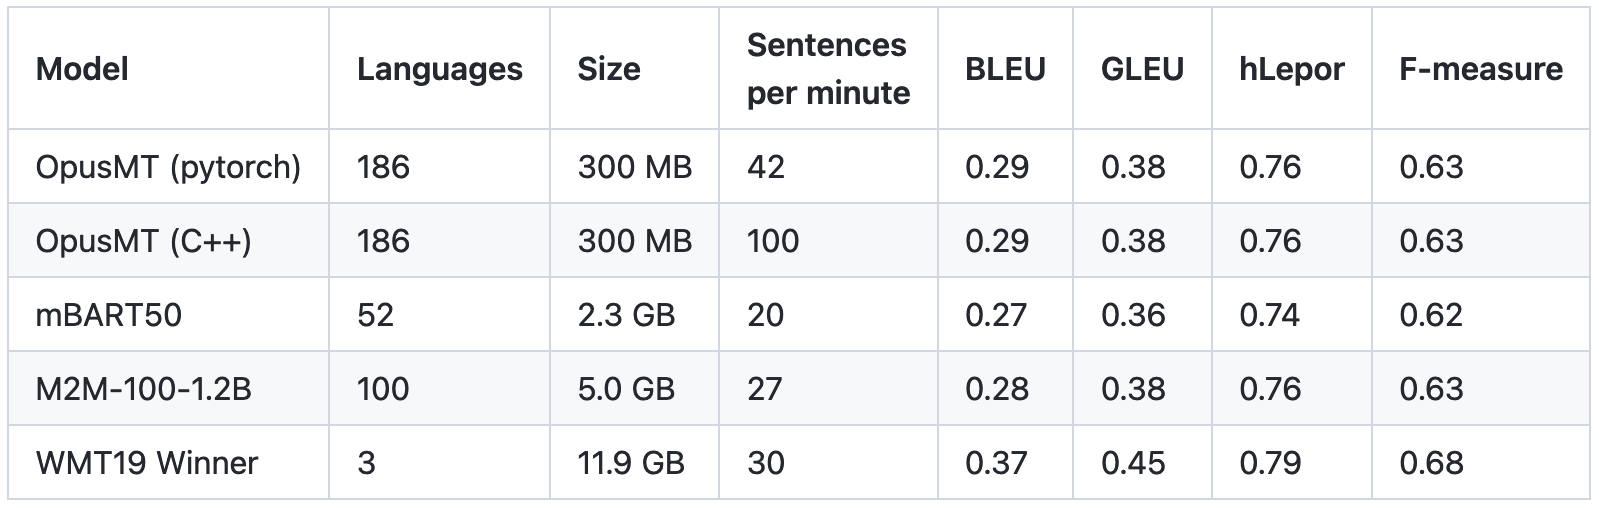
</div>

The WMT19 Winner clearly outperformed the other models, however the superiority in terms of hLepor is lower than in terms of the other measures. It’s hard to recommend it though, because it’s only translating between German, English and Russian. The winners of the WMT19 translation challenges for other languages have not open-sourced their models.

Besides that, as opposed to the other multilingual models, the WMT19 winning model from Facebook was trained mostly on the WMT19 training data. This training data will have had many similarities to the WMT16 test dataset that was used for the evaluation in this notebook. Therefore, it may be the case that the model has performed better in our comparison than it would have on a different test dataset. How superior the WMT19 winning model is on a wider variety of linguistic data is uncertain.

Thus, the best recommendation for multilingual translation is the OpusMT model in the C++ implementation. It’s by far the fastest, covers the most languages and still has a slight advantage over the other multilingual models in terms of performance.

<br>

---



# 5. Discussion

Some metrics may give the impression that computers are better at translation than humans. However, these metrics do not necessarily capture the whole picture. At this point in time, computers can generate very good and fluent translations for some languages. However, the models reach their limits in the area of simultaneous translation or belletrisitic, for example.

In simultaneous translation, the human translator does not have the task of translating everything exactly. He knows what he should focus on and what he can leave out. Machine translation systems, on the other hand, translate everything and are not yet able to skip irrelvant parts in order to reduce the translation time. Furthermore, a human translator is able to account for body language or if a speaker is referencing slides that he presents.

Some translators, when translating Proust's seven-volume work “À la Recherche du Temps Perdu”, have sought to make the first word of the first volume the same as the last word of the last volume because the French original begins and ends with the same word. [[Craig, 2020]](#Craig)

Translation, then, in its most advanced form, involves close study of the original text and sometimes even the author's life story and circumstances. These are facets that neural machine translation systems are not yet able to conceive.

Furthermore, machine translation systems require a significantly larger amount of data to learn a language than humans. Although some methods have been proposed to improve the learning of low-resource languages, they remain a significant challenge for machine translation systems.

The robustness of machine translation systems also leaves a fair amount to be desired. Even a wrong punctuation mark can have a considerable influence on the resulting translation. Humans are still much better at dealing with errors in the source text and correcting them quickly.

In summary, there is still room for improvement in machine translation and it can be assumed that many innovations await us in the coming years.

<br>

---

# 6. Conclusion

The main purpose of this notebook was to present and evaluate the current state of the art of neural machine translation with Transformer-based libraries in Python. In the beginning, an overview of the history of machine translation has been presented in the form of a literature review. The current most advanced neural machine translation architecture, the Transformer, has been introduced.

In addition to relevant metrics for language evaluation, the architectures of neural networks, that were used for machine transalation before the Transformer, were presented. Those included attentional LSTM networks and attentional convolutional networks. The BLEU scores that the authors of these neural network architectures have been able to achieve were introduced as a benchmark for the performance of the Transformer-based Python libraries.

In the main part, five Transformer-based Python libraries have been presented. Both single sentence and corpus-level translations have been demonstrated for each model. In this conjunction, language evaluation scores were computed on a dataset of 3000 German-English sentence pairs from the WMT news data translation challenge in 2016, thus displaying the performance of the models on real-world data.

While Facebook has repeatedly introduced models in recent years that have raised the bar for scores in the common language evaluation metrics for certain languages in the scope of the WMT conference, they have probably done so primarily in order to profile themselves. These high-performance models are only useful for translation in a handful of languages and therefore cannot be considered the spearhead of neural machine translation in general.

When it comes to many-to-many multilingual translation, Facebook's M2M-100 model has demonstrated good performance. However, it was shown, that the C++ based implementation of OpusMT remains the best open-source option for multilingual machine translation in Python.

Overall, the results demonstrate that neural network based machine translation systems are able to produce translations that can largely compete with human translations within a much shorter span of time than a human would require.

<br>

---


# References

<a id='Bahdanau'>[Bahdanau et al., 2014]</a>

&ensp;&ensp;&ensp; <i>Bahdanau, D., Cho, K., & Bengio, Y. (2014). Neural Machine Translation by Jointly Learning to Align and Translate. ArXiv.org. https://arxiv.org/abs/1409.0473</i>

<a id='Baidu'>[Baidu, 2017]</a>

&ensp;&ensp;&ensp; <i>Baidu. (2017). WIPO Translate: Terms and Conditions for the Usage and User Guide A. What is it? https://patentscope.wipo.int/translate/wtapta-user-manual-en.pdf</i>

<a id='Brown'>[Brown et al., 1990]</a>

&ensp;&ensp;&ensp; <i>Brown, P. F., Cocke, J., Della Pietra, S. A., Della Pietra, V. J., Jelinek, F., Lafferty, J. D., Mercer, R. L., & Roossin, P. S. (1990). A Statistical Approach to Machine Translation. Computational Linguistics, 16(2), 79–85. https://aclanthology.org/J90-2002/</i>

<a id='Craig'>[Craig, 2020]</a>

&ensp;&ensp;&ensp; <i>Craig, H. E. (2020). Assessing the English and Spanish translations of Proust’s A la recherche du temps perdu. Peter Lang Publishing, Inc.</i>

<a id='Devlin'>[Devlin et al., 2018]</a>

&ensp;&ensp;&ensp; <i>Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. ArXiv.org. https://arxiv.org/abs/1810.04805</i>

<a id='Dong'>[Dong et al., 2015]</a>

&ensp;&ensp;&ensp; <i>Dong, D., Wu, H., He, W., Yu, D., & Wang, H. (2015, July 1). Multi-Task Learning for Multiple Language Translation. ACLWeb; Association for Computational Linguistics. https://doi.org/10.3115/v1/P15-1166</i>

<a id='Fan'>[Fan et al., 2020]</a>

&ensp;&ensp;&ensp; <i>Fan, A., Bhosale, S., Schwenk, H., Ma, Z., El-Kishky, A., Goyal, S., Baines, M., Celebi, O., Wenzek, G., Chaudhary, V., Goyal, N., Birch, T., Liptchinsky, V., Edunov, S., Grave, E., Auli, M., & Joulin, A. (2020). Beyond English-Centric Multilingual Machine Translation. ArXiv:2010.11125 [Cs]. https://arxiv.org/abs/2010.11125</i>

<a id='Gehring'>[Gehring et al., 2017]</a>

&ensp;&ensp;&ensp; <i>Gehring, J., Auli, M., Grangier, D., Yarats, D., & Dauphin, Yann N. (2017). Convolutional Sequence to Sequence Learning. ArXiv.org. https://arxiv.org/abs/1705.03122</i>

<a id='Han'>[Han et al., 2013]</a>

&ensp;&ensp;&ensp; <i>Han, F., Wong, D., Mo, D., Chao, L., Lu, Y., Wang, Y., & Zhou, J. (2013). A Description of Tunable Machine Translation Evaluation Systems in WMT13 Metrics Task (pp. 414–421). https://aclanthology.org/W13-2253.pdf</i>

<a id='History'>[History of Information, n.d.]</a>

&ensp;&ensp;&ensp; <i>History of Information. (n.d.). The First Public Demonstration of Machine Translation Occurs : History of Information. Www.historyofinformation.com. Retrieved February 8, 2022, from https://www.historyofinformation.com/detail.php?id=666</i>

<a id='IBM'>[IBM, 1954]</a>

&ensp;&ensp;&ensp; <i>IBM. (1954, January 8). IBM Archives: 701 Translator. Www.ibm.com. https://www.ibm.com/ibm/history/exhibits/701/701_translator.html</i>

<a id='Junczys'>[Junczys-Dowmunt et al., 2018]</a>

&ensp;&ensp;&ensp; <i>Junczys-Dowmunt, M., Grundkiewicz, R., Dwojak, T., Hoang, H., Heafield, K., Neckermann, T., Seide, F., Germann, U., Aji, A. F., Bogoychev, N., Martins, A. F. T., & Birch, A. (2018, July 1). Marian: Fast Neural Machine Translation in C++. ACLWeb; Association for Computational Linguistics. https://doi.org/10.18653/v1/P18-4020</i>

<a id='Luong'>[Luong et al., 2015]</a>

&ensp;&ensp;&ensp; <i>Luong, M.-T., Pham, H., & Manning, C. D. (2015). Effective Approaches to Attention-based Neural Machine Translation. ArXiv.org. https://arxiv.org/abs/1508.04025</i>

<a id='Melamed'>[Melamed et al., 2003]</a>

&ensp;&ensp;&ensp; <i>Melamed, I. D., Green, R., & Turian, J. P. (2003). Precision and Recall of Machine Translation. ACLWeb. https://aclanthology.org/N03-2021/</i>

<a id='MUC'>[MUC-4, 1992]</a>

&ensp;&ensp;&ensp; <i>FOURTH MESSAGE UNDERSTANDING CONFERENCE (MUC-4). (1992). https://www.aclweb.org/anthology/M92-1000.pdf</i>

<a id='Mutton'>[Mutton et al., 2007]</a>

&ensp;&ensp;&ensp; <i>Mutton, A., Dras, M., Wan, S., & Dale, R. (2007, June 1). GLEU: Automatic Evaluation of Sentence-Level Fluency. ACLWeb; Association for Computational Linguistics. https://aclanthology.org/P07-1044/</i>

<a id='Ng'>[Ng et al., 2019]</a>

&ensp;&ensp;&ensp; <i>Ng, N., Yee, K., Baevski, A., Ott, M., Auli, M., & Edunov, S. (2019). Facebook FAIR’s WMT19 News Translation Task Submission. ArXiv:1907.06616 [Cs]. https://arxiv.org/abs/1907.06616</i>

<a id='Och'>[Och, 2006]</a>

&ensp;&ensp;&ensp; <i>Och, F. (2006, April 28). Statistical machine translation live. Google AI Blog. https://ai.googleblog.com/2006/04/statistical-machine-translation-live.html</i>

<a id='Papineni'>[Papineni et al., 2001]</a>

&ensp;&ensp;&ensp; <i>Papineni, K., Roukos, S., Ward, T., & Zhu, W.-J. (2001). BLEU. Proceedings of the 40th Annual Meeting on Association for Computational Linguistics - ACL ’02. https://doi.org/10.3115/1073083.1073135</i>

<a id='Sennrich'>[Sennrich et al., 2015]</a>

&ensp;&ensp;&ensp; <i>Sennrich, R., Haddow, B., & Birch, A. (2015). Neural Machine Translation of Rare Words with Subword Units. ArXiv.org. https://arxiv.org/abs/1508.07909</i>

<a id='Sun'>[Sun et al., 2019]</a>

&ensp;&ensp;&ensp; <i>Sun, Y., Wang, S., Li, Y., Feng, S., Tian, H., Wu, H., & Wang, H. (2019). ERNIE 2.0: A Continual Pre-training Framework for Language Understanding. ArXiv.org. https://arxiv.org/abs/1907.12412</i>

<a id='Tang'>[Tang et al., 2020]</a>

&ensp;&ensp;&ensp; <i>Tang, Y., Tran, C., Li, X., Chen, P.-J., Goyal, N., Chaudhary, V., Gu, J., & Fan, A. (2020). Multilingual Translation with Extensible Multilingual Pretraining and Finetuning. ArXiv:2008.00401 [Cs]. https://arxiv.org/abs/2008.00401</i>

<a id='Tiedemann'>[Tiedemann & Thottingal, 2020]</a>

&ensp;&ensp;&ensp; <i>Tiedemann, J., & Thottingal, S. (2020, November 1). OPUS-MT – Building open translation services for the World. ACLWeb; European Association for Machine Translation. https://aclanthology.org/2020.eamt-1.61/</i>

<a id='Tran'>[Tran et al., 2021]</a>

&ensp;&ensp;&ensp; <i>Tran, C., Bhosale, S., Cross, J., Koehn, P., Edunov, S., & Fan, A. (2021). Facebook AI WMT21 News Translation Task Submission. ArXiv:2108.03265 [Cs]. https://arxiv.org/abs/2108.03265</i>

<a id='Vaswani'>[Vaswani et al., 2017]</a>

&ensp;&ensp;&ensp; <i>Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, Aidan N, Kaiser, L., & Polosukhin, I. (2017). Attention Is All You Need. ArXiv.org. https://arxiv.org/abs/1706.03762</i>

<a id='Wang2021'>[Wang et al., 2021]</a>

&ensp;&ensp;&ensp; <i>Wang, H., Wu, H., He, Z., Huang, L., & Church, K. W. (2021). Progress in Machine Translation. Engineering. https://doi.org/10.1016/j.eng.2021.03.023</i>

<a id='Wang2006'>[Wang et al., 2006]</a>

&ensp;&ensp;&ensp; <i>Wang, H., Wu, H., & Liu, Z. (2006, July 1). Word Alignment for Languages with Scarce Resources Using Bilingual Corpora of Other Language Pairs. ACLWeb; Association for Computational Linguistics. https://aclanthology.org/P06-2112/</i>

<a id='Weaver'>[Weaver, 1947]</a>

&ensp;&ensp;&ensp; <i>Weaver, W. (1947, March). Warren Weaver Suggests Applying Cryptanalysis Techniques to Translation : History of Information. Www.historyofinformation.com. https://www.historyofinformation.com/detail.php?id=2990</i>

<a id='Wikipedia'>[Wikipedia, 2019]</a>

&ensp;&ensp;&ensp; <i>Wikipedia. (2019, April 19). Precision and Recall. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Precision_and_recall</i>

<a id='WMT'>[WMT, 2014]</a>

&ensp;&ensp;&ensp; <i>WMT. (2014, June). Www.statmt.org. https://www.statmt.org/wmt14/
ACL 2014 Ninth Workshop on Statistical Machine Translation</i>

<a id='Wolf'>[Wolf et al., 2020]</a>

&ensp;&ensp;&ensp; <i>Wolf, T., Debut, L., Sanh, V., Chaumond, J., Delangue, C., Moi, A., Cistac, P., Ma, C., Jernite, Y., Plu, J., Xu, C., Le Scao, T., Gugger, S., Drame, M., Lhoest, Q., & Rush, A. M. (2020, October 1). Transformers: State-of-the-Art Natural Language Processing. GitHub. https://github.com/huggingface/transformers/blob/master/src/transformers/models/marian/convert_marian_to_pytorch.py</i>

<a id='Wu'>[Wu et al., 2016]</a>

&ensp;&ensp;&ensp; <i>Wu, Y., Schuster, M., Chen, Z., Le, Q. V., Norouzi, M., Macherey, W., Krikun, M., Cao, Y., Gao, Q., Macherey, K., Klingner, J., Shah, A., Johnson, M., Liu, X., Kaiser, Ł., Gouws, S., Kato, Y., Kudo, T., Kazawa, H., & Stevens, K. (2016). Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation. ArXiv.org. https://arxiv.org/abs/1609.08144</i>


<div>
<img src="" width="700"/>
</div>